## Loading Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import string
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#importing dataset
df = pd.read_csv('data.csv')

In [2]:
df = df.drop(['URLs'], axis=1)

In [3]:
df = df.drop(['Headline'], axis=1)

In [4]:
df.head()

,Body,Label
0,Image copyright Getty Images\nOn Sunday mornin...,1
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,The feud broke into public view last week when...,1
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,"Country singer Jason Aldean, who was performin...",1


In [5]:
df['Body'].describe()

count                                                  3988
unique                                                 2863
top       A Potato Battery Can Light up a Room for Over ...
freq                                                    143
Name: Body, dtype: object

In [6]:
df['Label'].describe()

count    4009.000000
mean        0.466949
std         0.498969
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Label, dtype: float64

## Displaying Target variable

In [7]:
x = df['Label'].value_counts().index.tolist()
y = df['Label'].value_counts()

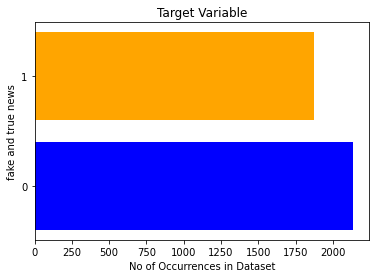

In [9]:
c = ['blue', 'orange', 'green', 'yellow', 'red', 'gray', 'black']
plt.barh(np.array(x), np.array(y), color = c)
plt.xlabel("No of Occurrences in Dataset")
plt.yticks(np.array(x))
plt.ylabel("fake and true news")
plt.title("Target Variable")
plt.show()

## Cleaning text

In [9]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [10]:
clean_news=df.copy()

In [11]:
clean_news['Body']=clean_news['Body'].apply(lambda x:review_cleaning(x))
clean_news.head()

,Body,Label
0,image copyright getty imageson sunday morning ...,1
1,london reuters “last flag flying” a comedydra...,1
2,the feud broke into public view last week when...,1
3,mexico city reuters egypt’s cheiron holdings ...,1
4,country singer jason aldean who was performing...,1


In [12]:
stop = stopwords.words('english')
clean_news['Body'] = clean_news['Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,Body,Label
0,image copyright getty imageson sunday morning ...,1
1,london reuters “last flag flying” comedydrama ...,1
2,feud broke public view last week mr corker sai...,1
3,mexico city reuters egypt’s cheiron holdings l...,1
4,country singer jason aldean performing las veg...,1


## Calculating polarity, review and word count

D:\Users\abuba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\abuba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\abuba\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

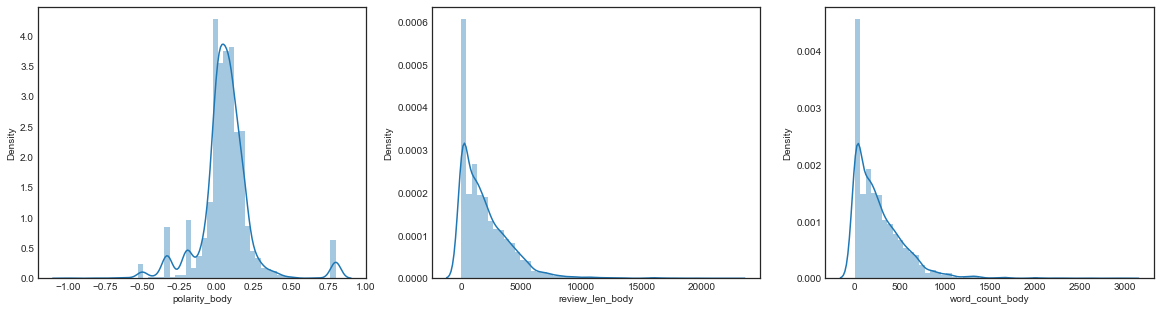

In [13]:
#Extracting the features from the news
clean_news['polarity_body'] = clean_news['Body'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len_body'] = clean_news['Body'].astype(str).apply(len)
clean_news['word_count_body'] = clean_news['Body'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity_body'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len_body'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count_body'])
fig = plt.gcf()

## Generating Wordcloud

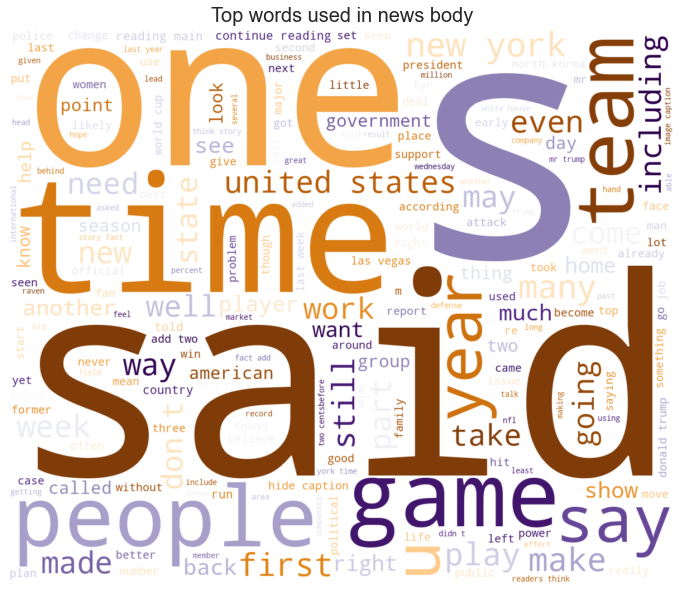

In [14]:
plt.figure(figsize = (12,12))
text = ' '.join(clean_news['Body'].fillna('').values)
wordcloud = WordCloud(margin = 10, background_color='white', colormap='PuOr', width=1200, height=1000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words used in news body', fontsize=20)
plt.axis('off')
plt.show()

## Unigram

In [15]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 10 words
common_words = get_top_n_words(clean_news['Body'], 10)

list_word_1 = []
list_freq_1 = []
#Printing the word and frequency
for word, freq in common_words:
    list_word_1.append(word)
    list_freq_1.append(freq)
    print(word, freq)

said 8234
us 4218
one 4148
would 4056
new 3977
also 3346
two 2969
first 2912
people 2756
like 2746


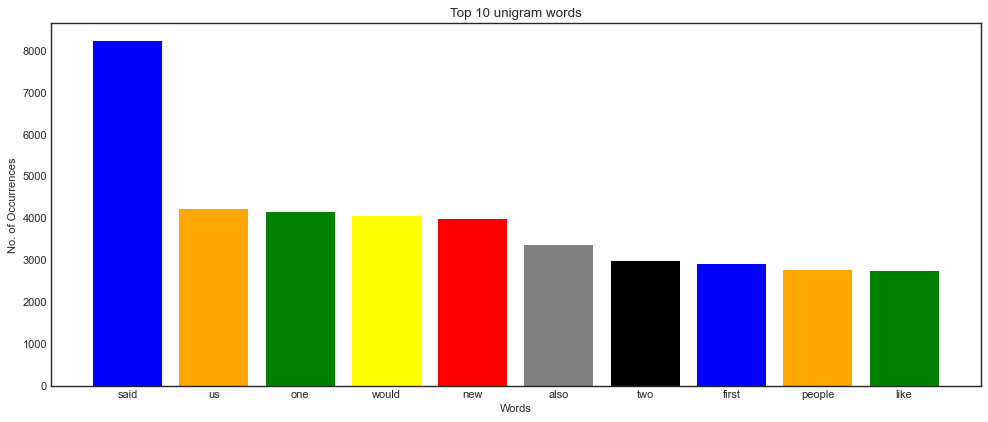

In [16]:
figure(figsize=(15, 6), dpi=80)

plt.bar(np.array(list_word_1), np.array(list_freq_1), color = c)
plt.xlabel("Words")
plt.xticks(np.array(list_word_1))
plt.ylabel("No. of Occurrences")
plt.title("Top 10 unigram words")
plt.show()

## Bigram

In [17]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 10 words
common_words = get_top_n_bigram(clean_news['Body'], 10)


list_word_2 = []
list_freq_2 = []

#Printing the word and frequency
for word, freq in common_words:
    list_word_2.append(word)
    list_freq_2.append(freq)
    print(word, freq)


new york 1346
united states 1102
continue reading 750
reading main 748
hide caption 677
las vegas 611
donald trump 502
world cup 480
north korea 463
add two 449


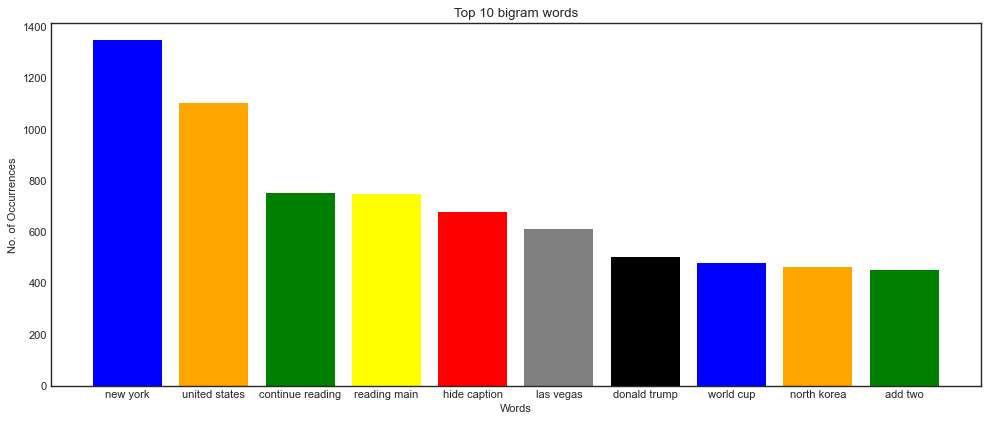

In [18]:
figure(figsize=(15, 6), dpi=80)

plt.bar(np.array(list_word_2), np.array(list_freq_2), color = c)
plt.xlabel("Words")
plt.xticks(np.array(list_word_2))
plt.ylabel("No. of Occurrences")
plt.title("Top 10 bigram words")
plt.show()

## Trigram

In [19]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(clean_news['Body'], 10)

list_word_3 = []
list_freq_3 = []

#Printing the word and frequency
for word, freq in common_words:
    list_word_3.append(word)
    list_freq_3.append(freq)
    print(word, freq)

continue reading main 748
readers think story 446
think story fact 446
story fact add 446
fact add centsbefore 435
new york times 409
shot amazing sports 336
amazing sports photos 336
hide caption shot 324
caption shot amazing 324


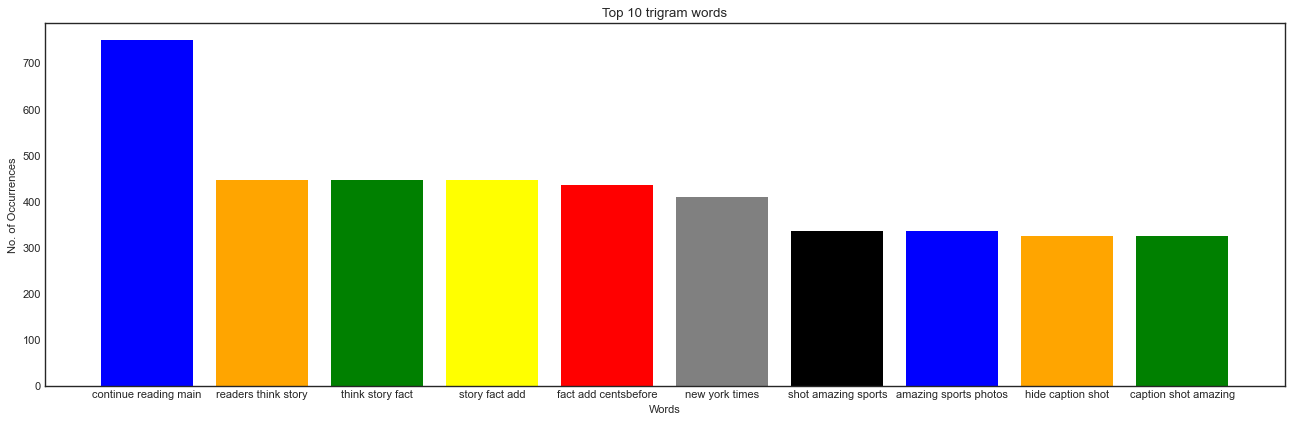

In [20]:
figure(figsize=(20, 6), dpi=80)

plt.bar(np.array(list_word_3), np.array(list_freq_3), color = c)
plt.xlabel("Words")
plt.xticks(np.array(list_word_3))
plt.ylabel("No. of Occurrences")
plt.title("Top 10 trigram words")
plt.show()

## Top used words in fake news

In [21]:
fake_news = clean_news.loc[clean_news['Label'] == 1]

In [22]:
fake_news

,Body,Label,polarity_body,review_len_body,word_count_body
0,image copyright getty imageson sunday morning ...,1,0.097076,4520,588
1,london reuters “last flag flying” comedydrama ...,1,0.087460,2383,320
2,feud broke public view last week mr corker sai...,1,0.048445,4896,666
3,mexico city reuters egypt’s cheiron holdings l...,1,-0.032738,477,61
4,country singer jason aldean performing las veg...,1,-0.115909,147,22
...,...,...,...,...,...
3995,image copyright getty images image caption har...,1,0.108780,5366,687
3999,file photo oct st louis mo usa boston red sox ...,1,0.061955,1263,180
4001,mr leroux born hervé peugnet may bapaume north...,1,0.184448,3130,423
4002,ethical questions loom vice president mike pen...,1,-0.108333,156,21


In [23]:
fake_news = fake_news.drop(['polarity_body'], axis=1)
fake_news = fake_news.drop(['review_len_body'], axis=1)
fake_news = fake_news.drop(['word_count_body'], axis=1)

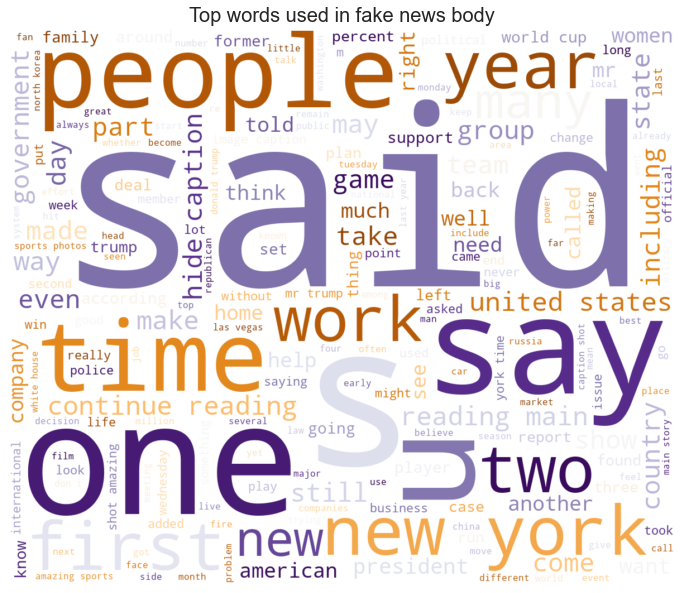

In [24]:
plt.figure(figsize = (12,12))
text = ' '.join(fake_news['Body'].fillna('').values)
wordcloud = WordCloud(margin = 10, background_color='white', colormap='PuOr', width=1200, height=1000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words used in fake news body', fontsize=20)
plt.axis('off')
plt.show()

In [25]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 10 words
common_words = get_top_n_words(fake_news['Body'], 10)

list_fakeword_1 = []
list_fakefreq_1 = []
#Printing the word and frequency
for word, freq in common_words:
    list_fakeword_1.append(word)
    list_fakefreq_1.append(freq)
    print(word, freq)

said 7177
would 2577
new 2444
us 2365
one 2263
mr 2193
also 1932
trump 1798
people 1787
world 1553


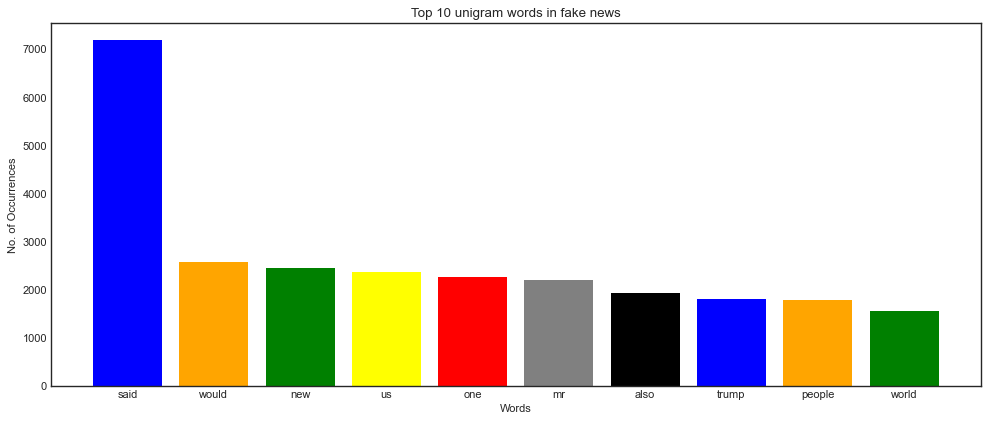

In [26]:
figure(figsize=(15, 6), dpi=80)

plt.bar(np.array(list_fakeword_1), np.array(list_fakefreq_1), color = c)
plt.xlabel("Words")
plt.xticks(np.array(list_fakeword_1))
plt.ylabel("No. of Occurrences")
plt.title("Top 10 unigram words in fake news")
plt.show()

## Top used words in true news

In [27]:
true_news = clean_news.loc[clean_news['Label'] == 0]

In [28]:
true_news = true_news.drop(['polarity_body'], axis=1)
true_news = true_news.drop(['review_len_body'], axis=1)
true_news = true_news.drop(['word_count_body'], axis=1)

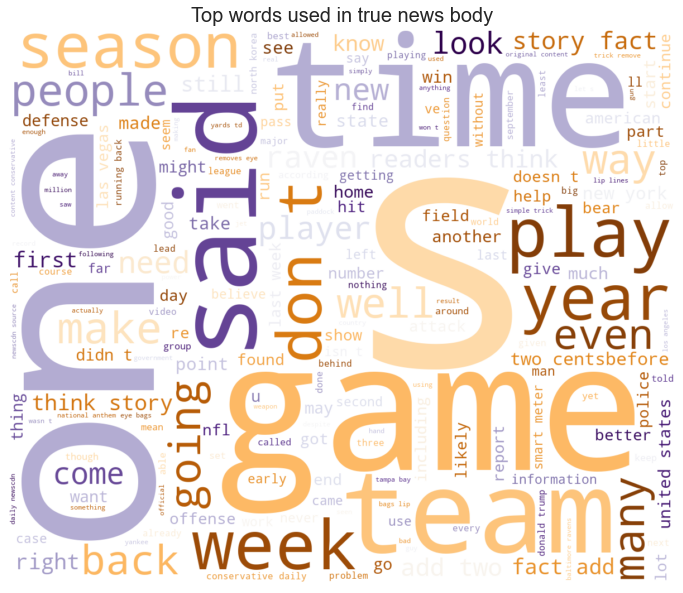

In [29]:
plt.figure(figsize = (12,12))
text = ' '.join(true_news['Body'].fillna('').values)
wordcloud = WordCloud(margin = 10, background_color='white', colormap='PuOr', width=1200, height=1000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words used in true news body', fontsize=20)
plt.axis('off')
plt.show()

In [30]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 10 words
common_words = get_top_n_words(true_news['Body'], 10)

list_trueword_1 = []
list_truefreq_1 = []
#Printing the word and frequency
for word, freq in common_words:
    list_trueword_1.append(word)
    list_truefreq_1.append(freq)
    print(word, freq)

one 1885
us 1853
game 1740
new 1533
week 1519
two 1501
would 1479
also 1414
first 1402
like 1366


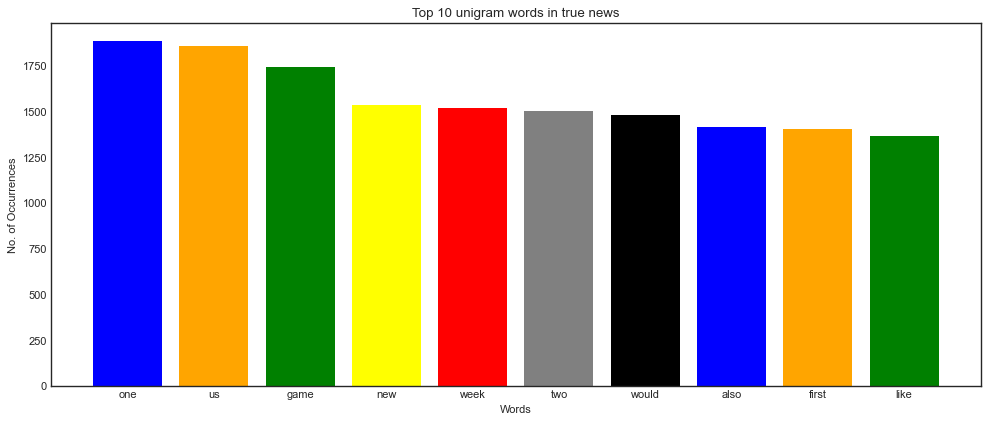

In [31]:
figure(figsize=(15, 6), dpi=80)

plt.bar(np.array(list_trueword_1), np.array(list_truefreq_1), color = c)
plt.xlabel("Words")
plt.xticks(np.array(list_trueword_1))
plt.ylabel("No. of Occurrences")
plt.title("Top 10 unigram words in true news")
plt.show()

## Finding correlation between top 10 unigram words

In [32]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['Body']].reset_index(drop=True)
news_features.head()

,Body
0,image copyright getty imageson sunday morning ...
1,london reuters “last flag flying” comedydrama ...
2,feud broke public view last week mr corker sai...
3,mexico city reuters egypt’s cheiron holdings l...
4,country singer jason aldean performing las veg...


In [33]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = ''.join(news_features['Body'][i])
    corpus.append(news)   

In [34]:
cv1 = CountVectorizer(ngram_range=(1,1), max_features=10).fit(news_features['Body'])

X1= cv1.fit(corpus)
print(X1.vocabulary_)
print(cv1.get_feature_names())
X1 = cv1.transform(corpus)
X1 = cv1.fit_transform(corpus)
print(X1.shape)
#print(X1)
#print(X1.toarray())

data1 = pd.DataFrame(X1.toarray(),columns = cv1.get_feature_names())


{'first': 1, 'said': 6, 'new': 3, 'one': 4, 'like': 2, 'two': 7, 'people': 5, 'us': 8, 'also': 0, 'would': 9}
['also', 'first', 'like', 'new', 'one', 'people', 'said', 'two', 'us', 'would']
(4009, 10)


In [35]:
data1.shape

(4009, 10)

In [36]:
data1.head()

,also,first,like,new,one,people,said,two,us,would
0,0,1,2,1,1,2,2,1,2,0
1,1,0,0,0,2,0,4,2,1,0
2,3,0,3,5,1,2,9,0,0,3
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [37]:
data1['Label'] = clean_news['Label']

In [38]:
data1.corr(method="pearson")

,also,first,like,new,one,people,said,two,us,would,Label
also,1.000000,0.283329,0.292054,0.280361,0.374837,0.291801,0.317855,0.260992,0.240455,0.367981,0.134656
first,0.283329,1.000000,0.252333,0.210205,0.390636,0.121819,0.100711,0.400337,0.072767,0.199959,0.054192
like,0.292054,0.252333,1.000000,0.211250,0.389578,0.371268,0.199040,0.221765,0.177956,0.314872,0.035856
new,0.280361,0.210205,0.211250,1.000000,0.254430,0.174910,0.263963,0.215176,0.161979,0.258569,0.158607
one,0.374837,0.390636,0.389578,0.254430,1.000000,0.346970,0.288059,0.409797,0.132467,0.323328,0.095730
people,0.291801,0.121819,0.371268,0.174910,0.346970,1.000000,0.350528,0.116439,0.203791,0.314062,0.156556
said,0.317855,0.100711,0.199040,0.263963,0.288059,0.350528,1.000000,0.181098,0.181396,0.377869,0.449310
two,0.260992,0.400337,0.221765,0.215176,0.409797,0.116439,0.181098,1.000000,0.105576,0.197184,0.031336
us,0.240455,0.072767,0.177956,0.161979,0.132467,0.203791,0.181396,0.105576,1.000000,0.332720,0.082482
would,0.367981,0.199959,0.314872,0.258569,0.323328,0.314062,0.377869,0.197184,0.332720,1.000000,0.177918


<AxesSubplot:>

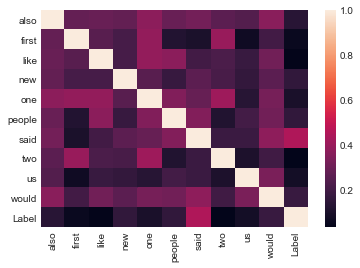

In [39]:
%matplotlib inline
# calculate the correlation matrix
corr = data1.corr(method="pearson")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [40]:
data1.corr(method="kendall")

,also,first,like,new,one,people,said,two,us,would,Label
also,1.000000,0.308130,0.322584,0.291451,0.337613,0.303227,0.315835,0.230135,0.262770,0.370122,0.176638
first,0.308130,1.000000,0.295545,0.247405,0.358210,0.178619,0.142973,0.311973,0.136836,0.262478,0.063802
like,0.322584,0.295545,1.000000,0.234248,0.341756,0.307627,0.187433,0.200654,0.217991,0.354377,0.029816
new,0.291451,0.247405,0.234248,1.000000,0.285905,0.251054,0.276606,0.169883,0.167356,0.284823,0.214084
one,0.337613,0.358210,0.341756,0.285905,1.000000,0.306615,0.254268,0.304121,0.146361,0.339650,0.119174
people,0.303227,0.178619,0.307627,0.251054,0.306615,1.000000,0.309984,0.113714,0.241127,0.304375,0.190679
said,0.315835,0.142973,0.187433,0.276606,0.254268,0.309984,1.000000,0.145894,0.211971,0.398615,0.518714
two,0.230135,0.311973,0.200654,0.169883,0.304121,0.113714,0.145894,1.000000,0.069477,0.209335,0.033811
us,0.262770,0.136836,0.217991,0.167356,0.146361,0.241127,0.211971,0.069477,1.000000,0.260394,0.128007
would,0.370122,0.262478,0.354377,0.284823,0.339650,0.304375,0.398615,0.209335,0.260394,1.000000,0.203190


<AxesSubplot:>

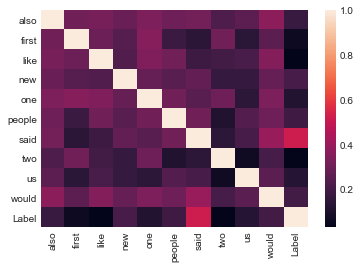

In [41]:
%matplotlib inline
# calculate the correlation matrix
corr = data1.corr(method="kendall")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Finding correlation between top 10 bigram words

In [42]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['Body']].reset_index(drop=True)

In [43]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = ''.join(news_features['Body'][i])
    corpus.append(news)   

In [44]:
cv1 = CountVectorizer(ngram_range=(2,2), max_features=10).fit(news_features['Body'])

X1= cv1.fit(corpus)
print(X1.vocabulary_)
print(cv1.get_feature_names())
X1 = cv1.transform(corpus)
X1 = cv1.fit_transform(corpus)
print(X1.shape)
#print(X1)
#print(X1.toarray())

data1 = pd.DataFrame(X1.toarray(),columns = cv1.get_feature_names())


{'donald trump': 2, 'new york': 5, 'united states': 8, 'north korea': 6, 'continue reading': 1, 'reading main': 7, 'las vegas': 4, 'add two': 0, 'world cup': 9, 'hide caption': 3}
['add two', 'continue reading', 'donald trump', 'hide caption', 'las vegas', 'new york', 'north korea', 'reading main', 'united states', 'world cup']
(4009, 10)


In [45]:
data1['Label'] = clean_news['Label']

In [46]:
data1.corr(method="pearson")

,add two,continue reading,donald trump,hide caption,las vegas,new york,north korea,reading main,united states,world cup,Label
add two,1.000000,-0.087119,0.014754,-0.024386,-0.026185,-0.041978,-0.036851,-0.086911,-0.063821,-0.030195,-0.322040
continue reading,-0.087119,1.000000,-0.018274,-0.017774,-0.012352,0.500669,0.010175,0.999548,0.206372,0.039781,0.267885
donald trump,0.014754,-0.018274,1.000000,0.023935,0.046775,0.011382,0.203956,-0.018096,0.225205,-0.026875,0.072685
hide caption,-0.024386,-0.017774,0.023935,1.000000,0.133282,0.034103,-0.008692,-0.017732,0.013555,-0.001117,0.075363
las vegas,-0.026185,-0.012352,0.046775,0.133282,1.000000,-0.011609,-0.014194,-0.017096,-0.000561,-0.013987,0.019048
new york,-0.041978,0.500669,0.011382,0.034103,-0.011609,1.000000,0.035895,0.501053,0.115492,0.004806,0.173739
north korea,-0.036851,0.010175,0.203956,-0.008692,-0.014194,0.035895,1.000000,0.010260,0.200210,-0.011240,0.013764
reading main,-0.086911,0.999548,-0.018096,-0.017732,-0.017096,0.501053,0.010260,1.000000,0.206044,0.039858,0.268590
united states,-0.063821,0.206372,0.225205,0.013555,-0.000561,0.115492,0.200210,0.206044,1.000000,0.092185,0.086284
world cup,-0.030195,0.039781,-0.026875,-0.001117,-0.013987,0.004806,-0.011240,0.039858,0.092185,1.000000,0.100521


<AxesSubplot:>

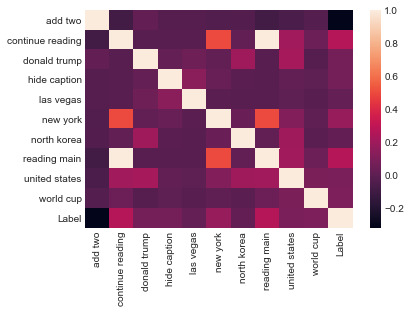

In [47]:
%matplotlib inline
# calculate the correlation matrix
corr = data1.corr(method="pearson")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [48]:
data1.corr(method="kendall")

,add two,continue reading,donald trump,hide caption,las vegas,new york,north korea,reading main,united states,world cup,Label
add two,1.000000,-0.099001,0.014797,-0.025945,-0.026505,-0.045299,-0.047152,-0.098661,-0.087853,-0.043102,-0.325701
continue reading,-0.099001,1.000000,-0.044437,-0.021005,-0.013939,0.501650,0.041186,0.996762,0.169598,0.092442,0.298985
donald trump,0.014797,-0.044437,1.000000,0.032995,0.057331,0.048441,0.236607,-0.044007,0.217673,-0.048595,0.114708
hide caption,-0.025945,-0.021005,0.032995,1.000000,0.071746,0.037391,-0.015084,-0.020932,0.023932,0.032672,0.079271
las vegas,-0.026505,-0.013939,0.057331,0.071746,1.000000,-0.003614,-0.009841,-0.017620,0.003684,-0.022202,0.036995
new york,-0.045299,0.501650,0.048441,0.037391,-0.003614,1.000000,0.052909,0.503753,0.133819,0.033363,0.197127
north korea,-0.047152,0.041186,0.236607,-0.015084,-0.009841,0.052909,1.000000,0.041657,0.243870,-0.014668,0.032817
reading main,-0.098661,0.996762,-0.044007,-0.020932,-0.017620,0.503753,0.041657,1.000000,0.168004,0.092954,0.301442
united states,-0.087853,0.169598,0.217673,0.023932,0.003684,0.133819,0.243870,0.168004,1.000000,0.117033,0.155141
world cup,-0.043102,0.092442,-0.048595,0.032672,-0.022202,0.033363,-0.014668,0.092954,0.117033,1.000000,0.150649


<AxesSubplot:>

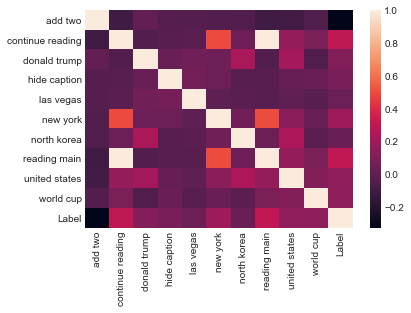

In [49]:
%matplotlib inline
# calculate the correlation matrix
corr = data1.corr(method="kendall")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Finding correlation between top 10 trigram words

In [50]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['Body']].reset_index(drop=True)

In [51]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = ''.join(news_features['Body'][i])
    corpus.append(news)   

In [52]:
cv1 = CountVectorizer(ngram_range=(3,3), max_features=10).fit(news_features['Body'])

X1= cv1.fit(corpus)
print(X1.vocabulary_)
print(cv1.get_feature_names())
X1 = cv1.transform(corpus)
X1 = cv1.fit_transform(corpus)
print(X1.shape)
#print(X1)
#print(X1.toarray())

data1 = pd.DataFrame(X1.toarray(),columns = cv1.get_feature_names())

{'new york times': 5, 'continue reading main': 2, 'readers think story': 6, 'think story fact': 9, 'story fact add': 8, 'fact add two': 3, 'add two centsbefore': 0, 'shot amazing sports': 7, 'amazing sports photos': 1, 'hide caption shot': 4}
['add two centsbefore', 'amazing sports photos', 'continue reading main', 'fact add two', 'hide caption shot', 'new york times', 'readers think story', 'shot amazing sports', 'story fact add', 'think story fact']
(4009, 10)


In [53]:
data1.corr(method = "pearson")

,add two centsbefore,amazing sports photos,continue reading main,fact add two,hide caption shot,new york times,readers think story,shot amazing sports,story fact add,think story fact
add two centsbefore,1.000000,-0.018923,-0.087702,0.987103,-0.018909,-0.092324,0.987103,-0.018923,0.987103,0.987103
amazing sports photos,-0.018923,1.000000,-0.013635,-0.018679,0.999987,-0.014685,-0.018679,1.000000,-0.018679,-0.018679
continue reading main,-0.087702,-0.013635,1.000000,-0.086571,-0.013625,0.638294,-0.086571,-0.013635,-0.086571,-0.086571
fact add two,0.987103,-0.018679,-0.086571,1.000000,-0.018665,-0.091185,1.000000,-0.018679,1.000000,1.000000
hide caption shot,-0.018909,0.999987,-0.013625,-0.018665,1.000000,-0.014674,-0.018665,0.999987,-0.018665,-0.018665
new york times,-0.092324,-0.014685,0.638294,-0.091185,-0.014674,1.000000,-0.091185,-0.014685,-0.091185,-0.091185
readers think story,0.987103,-0.018679,-0.086571,1.000000,-0.018665,-0.091185,1.000000,-0.018679,1.000000,1.000000
shot amazing sports,-0.018923,1.000000,-0.013635,-0.018679,0.999987,-0.014685,-0.018679,1.000000,-0.018679,-0.018679
story fact add,0.987103,-0.018679,-0.086571,1.000000,-0.018665,-0.091185,1.000000,-0.018679,1.000000,1.000000
think story fact,0.987103,-0.018679,-0.086571,1.000000,-0.018665,-0.091185,1.000000,-0.018679,1.000000,1.000000


<AxesSubplot:>

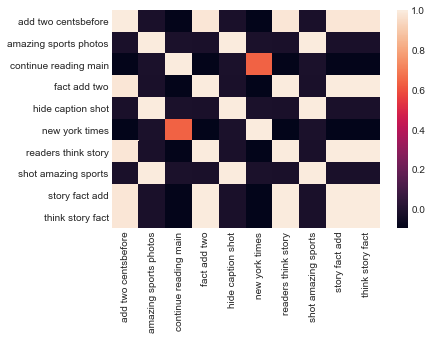

In [54]:
%matplotlib inline
# calculate the correlation matrix
corr = data1.corr(method="pearson")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [55]:
data1.corr(method="kendall")

,add two centsbefore,amazing sports photos,continue reading main,fact add two,hide caption shot,new york times,readers think story,shot amazing sports,story fact add,think story fact
add two centsbefore,1.000000,-0.019105,-0.098429,0.998503,-0.019105,-0.101272,0.998503,-0.019105,0.998503,0.998503
amazing sports photos,-0.019105,1.000000,-0.015450,-0.019076,1.000000,-0.016343,-0.019076,1.000000,-0.019076,-0.019076
continue reading main,-0.098429,-0.015450,1.000000,-0.098281,-0.015450,0.723562,-0.098281,-0.015450,-0.098281,-0.098281
fact add two,0.998503,-0.019076,-0.098281,1.000000,-0.019076,-0.101128,1.000000,-0.019076,1.000000,1.000000
hide caption shot,-0.019105,1.000000,-0.015450,-0.019076,1.000000,-0.016343,-0.019076,1.000000,-0.019076,-0.019076
new york times,-0.101272,-0.016343,0.723562,-0.101128,-0.016343,1.000000,-0.101128,-0.016343,-0.101128,-0.101128
readers think story,0.998503,-0.019076,-0.098281,1.000000,-0.019076,-0.101128,1.000000,-0.019076,1.000000,1.000000
shot amazing sports,-0.019105,1.000000,-0.015450,-0.019076,1.000000,-0.016343,-0.019076,1.000000,-0.019076,-0.019076
story fact add,0.998503,-0.019076,-0.098281,1.000000,-0.019076,-0.101128,1.000000,-0.019076,1.000000,1.000000
think story fact,0.998503,-0.019076,-0.098281,1.000000,-0.019076,-0.101128,1.000000,-0.019076,1.000000,1.000000


<AxesSubplot:>

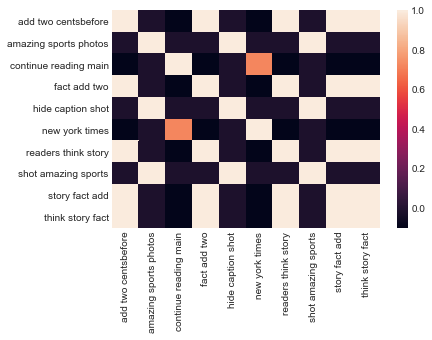

In [56]:
%matplotlib inline
# calculate the correlation matrix
corr = data1.corr(method="kendall")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)